<a href="https://colab.research.google.com/github/EcoCommons-Australia-2024-2026/notebooks/blob/zhaoxiangmax-patch-1/Import_species_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![EcoCommons Notebooks Banner](https://drive.google.com/uc?id=1UprYJGmRUZyS20lQrODTiHbl2Ywvl2dW)


# Species Distribution Analysis - Import Species Records from Big Open Access Datasets

---
Author details: Xiang Zhao

Editor details:

Contact details: support@ecocommons.org.au

Copyright statement: This script is the product of the EcoCommons platform.   
                     Please refer to the EcoCommons website for more details: https://www.ecocommons.org.au/

Date: Nov 2024  

---

# Script and data info:

This notebook, developed by the EcoCommons team, showcases how to download, and process both continuous and categorical environmental dataset that in the format of rasters to be used for SDM.

**Workflow Overview**:

- Initial Setup:
        Set the working directory and load necessary R packages (dismo, ggplot2, raster, googledrive, sp, dplyr, terra).
        Create directories to store raw data files.

- Open source species dataset introduction:

<br>

<blockquote>

| Database | Acronym | R Package | Registration requirement |
|:---------|----:|:-------------:|:-------------:|
| the Global Biodiversity Information Facility | GBIF   | rgbif   | Yes   |
| the Atlas of Living Australia   | ALA   | galah   | Yes   |
| eBird  | -   | auk  | Yes   |

<br> <!-- Adding this line for spacing -->

| Database | Pros | Cons |
|:---------|:----:|:-------------:|
| the Global Biodiversity Information Facility | - Global Coverage<br>- Open Access<br>- Standardized Data<br>- Broad Taxonomic Coverage<br>- Rich Metadata | - Data Quality Concerns<br>- Limited Real-time Updates<br>- Less Targeted Search |
| the Atlas of Living Australia | - Australian Focus<br>- Integrated Tools<br>- Collaboration<br>- Detailed Metadata | - Limited Geographic Coverage<br>- Less Diverse Taxonomy<br>- Data Quality Issues |
| eBird | - Citizen Science Contributions<br>- High Data Density<br>- Standardized Protocols<br>- Interactive Visualizations<br>- Mobile App Support | - Bird-specific Data<br>- Data Quality Dependence on User Expertise<br>- Bias Toward Accessible Areas<br>- Restricted Data Access |

</blockquote>

- Data downloaded from each datasets and comparision
       
In the near future, this material may form part of comprehensive support materials available to EcoCommons users.

If you have any corrections or suggestions to improve the efficiency, please [contact the EcoCommons](mailto:support@ecocommons.org.au) team.

# **Introduction**

There are multiple biodiversity data portals like **GBIF** (Global Biodiversity Information Facility), **ALA** (Atlas of Living Australia), and **eBird** because they serve different purposes, focus on various regions or taxonomic groups, and are operated by different organizations. Here's why these and other portals coexist.

------

<img src="https://raw.githubusercontent.com/EcoCommons-Australia-2024-2026/ec-notebook_site_materials/main/images/ALA_Logo_Inline_RGB.png" alt="ALA Logo" width="400">

### **Regional Focus:**

**ALA** specifically targets biodiversity data within Australia. It aggregates data from various Australian institutions, providing detailed information relevant to the country's ecosystems and species.

Other Regional Portals: Many countries or regions have their own portals to address local conservation needs, policies, and educational goals.

------

<img src="https://raw.githubusercontent.com/EcoCommons-Australia-2024-2026/ec-notebook_site_materials/main/images/ebird_725pxw.png" alt="ALA Logo" width="200">

### **Taxonomic Specialization:**

**eBird**: Focuses exclusively on bird species. Managed by the Cornell Lab of Ornithology, it leverages citizen science by allowing birdwatchers worldwide to contribute observations, providing real-time data on bird distribution and migration patterns.

Specialized Portals: Similar platforms exist for other taxonomic groups, like reptiles, insects, or plants, catering to specific research communities.

------

<img src="https://raw.githubusercontent.com/EcoCommons-Australia-2024-2026/ec-notebook_site_materials/main/images/Gbif-full-green-logo.svg" alt="ALA Logo" width="400">


### **Global Aggregation vs. Specialized Data**:

**GBIF**: Acts as a global aggregator, compiling biodiversity data from numerous sources, including regional portals like ALA and specialized databases like eBird. Its broad scope facilitates large-scale biodiversity analyses and policy-making.
Specialized Databases: Offer more detailed or niche datasets that might not be fully represented in global aggregators.
Organizational Mandates and Funding:

Different organizations have unique missions, funding sources, and stakeholders. They create portals aligned with their objectives, whether it's academic research, conservation, education, or citizen science engagement.

------

**Community Engagement and Citizen Science**:

Portals like eBird encourage public participation, making biodiversity data collection more inclusive and extensive. This engagement fosters environmental awareness and education among the general public.


### **In Summary:**

The existence of multiple biodiversity data portals reflects the complexity and diversity of global biodiversity itself. Each portal contributes uniquely by focusing on different regions, species groups, or community engagement strategies. Together, they create a comprehensive network that enhances our understanding of biodiversity, supports conservation efforts, and fosters global collaboration among scientists, policymakers, and the public.





## 1. Set working directory and make a folder to store data.

In [ ]:
# Set Workspace as the current working directory
workspace <- getwd()

env_data_dir <- file.path(workspace, "env_data")

# Create the 'raw_data' directory if it doesn't exist
if (!dir.exists(env_data_dir)) {
  dir.create(env_data_dir, recursive = TRUE)
  cat("Directory 'env_data' created successfully.\n")
} else {
  cat("Directory 'env_data' already exists.\n")
}


Directory 'env_data' created successfully.


## 2. Install and load essential libraries.

In [ ]:
# List of packages to check, install if needed, and load
packages <- c("dplyr", "sf", "ggplot2", "rnaturalearth", "rnaturalearthdata")

# Install missing packages and load them
for (pkg in packages) {
  if (!pkg %in% installed.packages()[, "Package"]) {
    install.packages(pkg)
  }
  library(pkg, character.only = TRUE)
}



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘units’


Linking to GEOS 3.11.1, GDAL 3.6.4, PROJ 9.1.1; sf_use_s2() is TRUE

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘rnaturalearthdata’


The following object is masked from ‘package:rnaturalearth’:

    countries110




## 3. Open source species dataset introducation

We will introduce four most popular and largest biodiversity datasets that allow people to download their data via their platforms or via serveral R packages. Please be noted, exploring those datasets on their own platforms are always the best way of downloading their data.


**Examplar species: Splendid Fairy-Wren (*Malurus splendens*)**

<img src="https://raw.githubusercontent.com/EcoCommons-Australia-2024-2026/ec-notebook_site/main/images/ala_sfw.jpeg" alt="ALA Image" width="400"/>

We are going to use a beautiful bird species - Splendid Fairy-Wren (*Malurus splendens*) as an examplar case to compare the data you can get from the four datasets.(Photographer: pimelea, more copyright information [here](https://biocache.ala.org.au/occurrences/a87e9029-e829-4e10-9988-1e74614af81b))


## 3.1 GBIF - the Global Biodiversity Information Facility

GBIF—the Global Biodiversity Information Facility—is an international network and data infrastructure funded by the world's governments and aimed at providing anyone, anywhere, open access to data about all types of life on Earth.

**You need to register with GBIF to get "username", "password", and "registered email address" to access their dataset via their R package "rgbif".**

In [ ]:
# Install the "rgbif" R package

install.packages("rgbif") # CRAN version

library(rgbif)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘triebeard’, ‘urltools’, ‘httpcode’, ‘plyr’, ‘crul’, ‘oai’, ‘lazyeval’




In [ ]:
# Setting GBIF credentials
Sys.setenv(GBIF_USER = "zhao89",
           GBIF_PWD = "mocfaj-ciqNiz-beqmi2",
           GBIF_EMAIL = "zhaoxiangmax@hotmail.com")


In [ ]:
# Check if environment variables are set
Sys.getenv("GBIF_USER")    # Should return your username
Sys.getenv("GBIF_PWD")     # Should return your password
Sys.getenv("GBIF_EMAIL")   # Should return your email


[1] "zhao89"

[1] "mocfaj-ciqNiz-beqmi2"

[1] "zhaoxiangmax@hotmail.com"

In [ ]:
taxonKey <- name_backbone("Malurus splendens")$usageKey
occ_search(taxonKey = taxonKey)

Records found [82735] 
Records returned [500] 
No. unique hierarchies [1] 
No. media records [500] 
No. facets [0] 
Args [occurrenceStatus=PRESENT, limit=500, offset=0, taxonKey=2487511,
     fields=all] 
# A tibble: 500 × 123
   key        scientificName  decimalLatitude decimalLongitude issues datasetKey
   <chr>      <chr>                     <dbl>            <dbl> <chr>  <chr>     
 1 4507935973 Malurus splend…           -34.4             116. cdc,c… 50c9509d-…
 2 4508022343 Malurus splend…           -34.8             118. cdc,c… 50c9509d-…
 3 4516338363 Malurus splend…           -32.0             116. cdc,c… 50c9509d-…
 4 4510148252 Malurus splend…           -23.1             114. cdc,c… 50c9509d-…
 5 4510484396 Malurus splend…           -32.2             116. cdc,c… 50c9509d-…
 6 4512212390 Malurus splend…           -34.8             118. cdc,c… 50c9509d-…
 7 4512139143 Malurus splend…           -34.8             118. cdc,c… 50c9509d-…
 8 4512198644 Malurus splend…           -31.

There are three formats of species data that GBIF provides. Usually, "SIMPLE" version would be sufficient.

|                   | Raw data | Interpreted data | Multimedia      | Coordinates            | Format                             | Estimated data size                |
|-------------------|----------|------------------|-----------------|------------------------|------------------------------------|-------------------------------------|
| **SIMPLE**        | ✘        | ✔               | ✘               | ✔ (if available)       | Tab-delimited CSV (for use in Excel, etc.) | **Very Large (TB)** (Hundreds of GB zipped for download) |
| **DARWIN CORE ARCHIVE** | ✔  | ✔               | ✔ (links)       | ✔ (if available)       | Tab-delimited CSV (for use in Excel, etc.) | **Very Large (TB)** (Hundreds of GB zipped for download)   |
| **SPECIES LIST**  | ✘        | ✔               | ✘               | ✘                      | Tab-delimited CSV (for use in Excel, etc.) |                                     |


In [ ]:
# Submit a download request for larger datasets
download_key <- occ_download(pred("taxonKey", taxonKey),format = "SIMPLE_CSV") # Use the taxonkey and SIMPLE format for Malurus splendens

In [ ]:
# GBIF platform will prepare your requested downloading, and you can check the status of the download.

occ_download_meta(download_key)

<<gbif download metadata>>
  Status: SUCCEEDED
  DOI: 10.15468/dl.6jq9du
  Format: SIMPLE_CSV
  Download key: 0011456-241107131044228
  Created: 2024-11-13T01:17:50.347+00:00
  Modified: 2024-11-13T01:19:40.900+00:00
  Download link: https://api.gbif.org/v1/occurrence/download/request/0011456-241107131044228.zip
  Total records: 82959

When the Status of above codes turns to "SUCCEEDED", then you can run the below codes for downloading.

In [ ]:
# Store the metadata output in a variable
download_meta <- occ_download_meta(download_key)

# Convert the metadata to a character string
download_meta_str <- capture.output(print(download_meta))

# Use a regular expression to extract the download key
download_key_extracted <- sub(".*Download key: ([^ ]+).*", "\\1", grep("Download key:", download_meta_str, value = TRUE))

# Print the extracted download key
print(download_key_extracted)


[1] "0011456-241107131044228"


In [ ]:
# Download to the directory only
occ_download_get(download_key, path = env_data_dir, overwrite = TRUE)

# Rename the downloaded file
file.rename(file.path(env_data_dir, paste0(download_key, ".zip")),
            file.path(env_data_dir, "GBIF_Malurus_splendens.zip"))


Download file size: 5.19 MB

On disk at /content/env_data/0011456-241107131044228.zip



<<gbif downloaded get>>
  Path: /content/env_data/0011456-241107131044228.zip
  File size: 5.19 MB

[1] TRUE

To download species data from the GBIF, you are required to register GBIF and provide your username, password, and email address.

In [ ]:
# Unzip the downloaded file
unzip_path <- file.path(env_data_dir, "GBIF_Malurus_splendens")  # Folder to unzip to
download_file <- file.path(env_data_dir, "GBIF_Malurus_splendens.zip")
unzip(download_file, exdir = unzip_path)

# Define the original and new file paths using the extracted download key
original_file <- file.path(unzip_path, paste0(download_key_extracted, ".csv"))
new_file <- file.path(unzip_path, "GBIF_Malurus_splendens.csv")

# Rename the file
file.rename(original_file, new_file)

# Check the unzipped files
unzipped_files <- list.files(unzip_path, recursive = TRUE)
print(unzipped_files)


[1] TRUE

[1] "GBIF_Malurus_splendens.csv"


In [ ]:
# Define the path to the CSV file within the unzipped directory
csv_file <- file.path(unzip_path, "GBIF_Malurus_splendens.csv")

# Read the tab-separated CSV file
GBIF_data <- read.csv(csv_file, sep = "\t", row.names = NULL) # GBIF csv contents are separated by tabs, so we tell R to separate conents by "\t"

# View the first few rows of the data
head(GBIF_data)

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,⋯,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,980652754,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS249232704,Animalia,Chordata,Aves,Passeriformes,Maluridae,Malurus,Malurus splendens,⋯,,,CC_BY_4_0,,obsr453588,,,2024-04-17T09:08:26.732Z,,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH_TAXON_CONCEPT_ID_IGNORED
2,980647331,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS249230602,Animalia,Chordata,Aves,Passeriformes,Maluridae,Malurus,Malurus splendens,⋯,,,CC_BY_4_0,,obsr453588,,,2024-04-17T08:23:45.550Z,,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH_TAXON_CONCEPT_ID_IGNORED
3,980642231,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS249160161,Animalia,Chordata,Aves,Passeriformes,Maluridae,Malurus,Malurus splendens,⋯,,,CC_BY_4_0,,obsr446091,,,2024-04-17T08:47:22.795Z,,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH_TAXON_CONCEPT_ID_IGNORED
4,980521628,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS247632598,Animalia,Chordata,Aves,Passeriformes,Maluridae,Malurus,Malurus splendens,⋯,,,CC_BY_4_0,,obsr445825,,,2024-04-17T08:23:41.484Z,,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH_TAXON_CONCEPT_ID_IGNORED
5,980376429,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS245776091,Animalia,Chordata,Aves,Passeriformes,Maluridae,Malurus,Malurus splendens,⋯,,,CC_BY_4_0,,obsr445825,,,2024-04-17T08:24:12.689Z,,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH_TAXON_CONCEPT_ID_IGNORED
6,980374601,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS245776540,Animalia,Chordata,Aves,Passeriformes,Maluridae,Malurus,Malurus splendens,⋯,,,CC_BY_4_0,,obsr445825,,,2024-04-17T08:23:33.185Z,,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH_TAXON_CONCEPT_ID_IGNORED


In [ ]:
colnames(GBIF_data)

[1] "gbifID"                           "datasetKey"                      
 [3] "occurrenceID"                     "kingdom"                         
 [5] "phylum"                           "class"                           
 [7] "order"                            "family"                          
 [9] "genus"                            "species"                         
[11] "infraspecificEpithet"             "taxonRank"                       
[13] "scientificName"                   "verbatimScientificName"          
[15] "verbatimScientificNameAuthorship" "countryCode"                     
[17] "locality"                         "stateProvince"                   
[19] "occurrenceStatus"                 "individualCount"                 
[21] "publishingOrgKey"                 "decimalLatitude"                 
[23] "decimalLongitude"                 "coordinateUncertaintyInMeters"   
[25] "coordinatePrecision"              "elevation"                       
[27] "elevationAccuracy"                "depth"                           
[29] "depthAccuracy"                    "eventDate"                       
[31] "day"                              "month"                           
[33] "year"                             "taxonKey"                        
[35] "speciesKey"                       "basisOfRecord"                   
[37] "institutionCode"                  "collectionCode"                  
[39] "catalogNumber"                    "recordNumber"                    
[41] "identifiedBy"                     "dateIdentified"                  
[43] "license"                          "rightsHolder"                    
[45] "recordedBy"                       "typeStatus"                      
[47] "establishmentMeans"               "lastInterpreted"                 
[49] "mediaType"                        "issue"

In [ ]:
# Load required packages
library(ggplot2)
library(rnaturalearth) # For the map data
library(dplyr) # For data manipulation if needed


In [ ]:
# Load Australia map data
australia_map <- ne_countries(scale = "medium", country = "Australia", returnclass = "sf")


Warning message:
“Removed 1911 rows containing missing values or values outside the scale range
(`geom_point()`).”


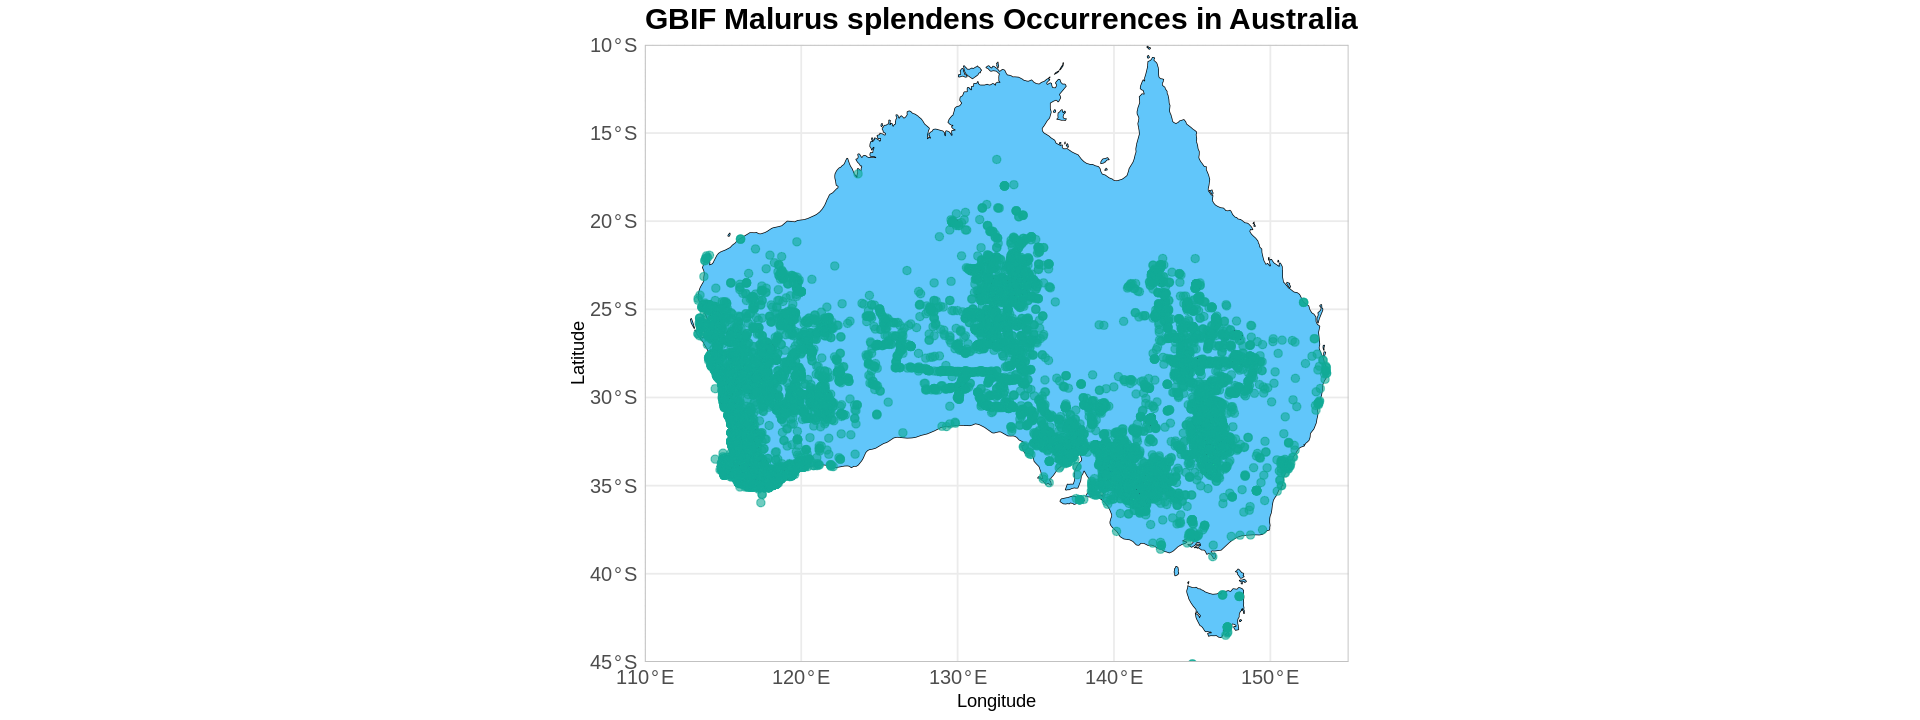

In [ ]:
# Plotting
ggplot() +
  geom_sf(data = australia_map, fill = "#61c6fa", color = "black") +  # Australia map fill and outline color
  geom_point(data = GBIF_data, aes(x = decimalLongitude, y = decimalLatitude),
             color = "#11aa96", alpha = 0.6, size = 2) +  # Occurrence points (adjusted color to match the palette)
  coord_sf(xlim = c(110, 155), ylim = c(-45, -10), expand = FALSE) +  # Set map limits to focus on Australia
  labs(
    x = "Longitude",
    y = "Latitude",
    title = "GBIF Malurus splendens Occurrences in Australia"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12),
    legend.text = element_text(size = 12),
    panel.border = element_rect(colour = "gray", fill = NA, linewidth = 0.5)
  )


Warning message:
“Removed 3598 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 3598 rows containing non-finite outside the scale range (`stat_bin()`).”


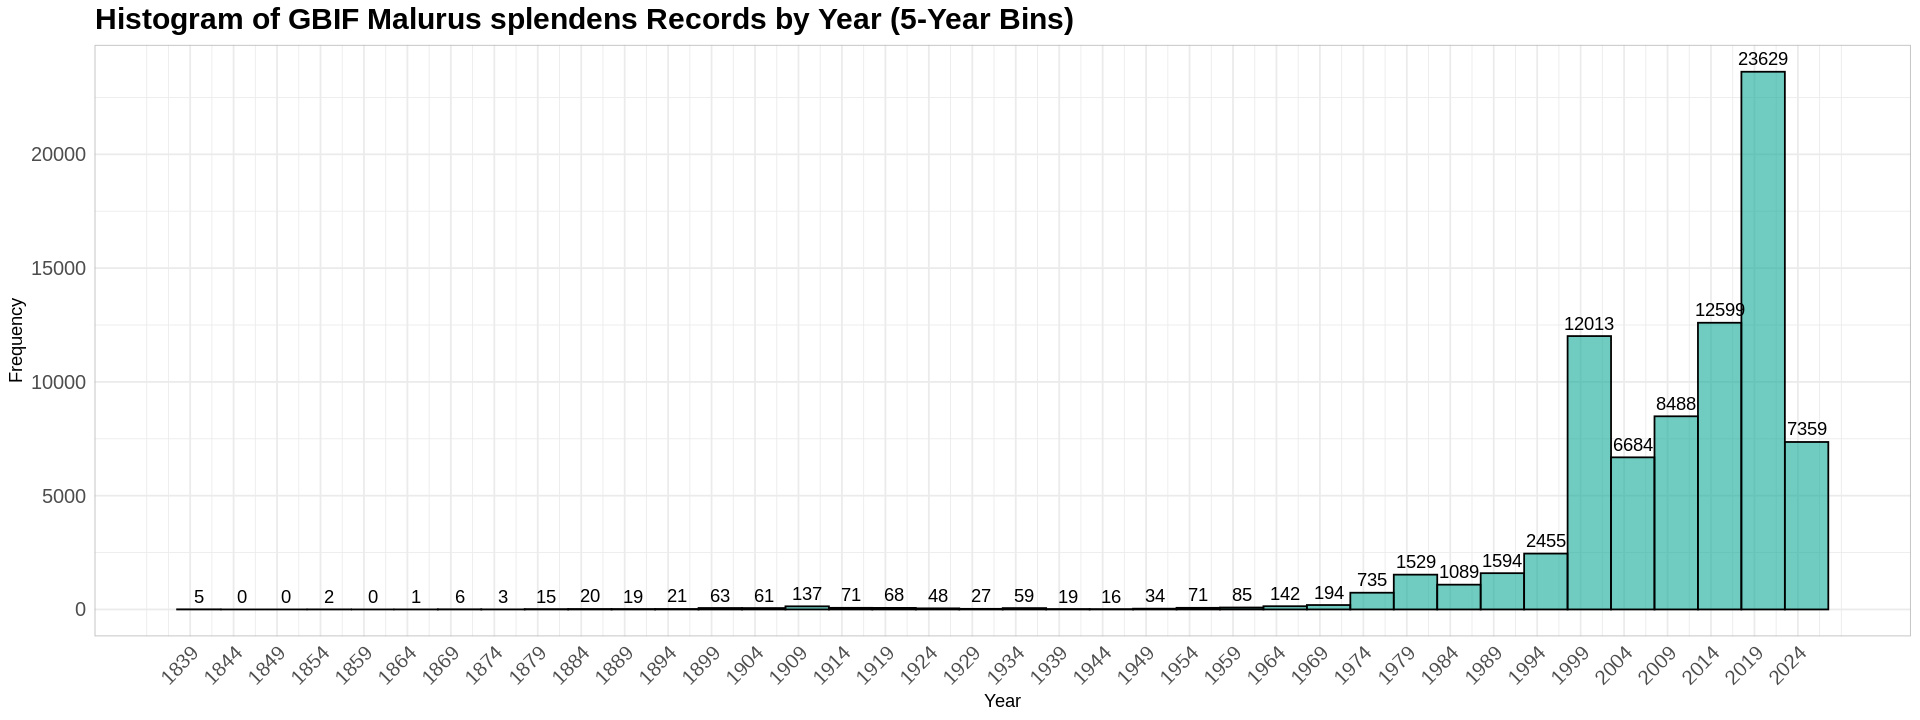

In [ ]:
# Set plot width and height for an interactive environment
options(repr.plot.width = 16, repr.plot.height = 6)

# Creating a histogram of the 'year' column with the updated style
GBIF_hist_plot <- ggplot(GBIF_data, aes(x = year)) +
  geom_histogram(binwidth = 5, fill = "#11aa96", color = "black", alpha = 0.6) +  # Updated color to match the palette
  labs(
    title = "Histogram of GBIF Malurus splendens Records by Year (5-Year Bins)",
    x = "Year",
    y = "Frequency"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),  # Rotate x-axis labels by 45 degrees
    axis.text.y = element_text(size = 12),
    panel.border = element_rect(colour = "gray", fill = NA, linewidth = 0.5)
  ) +
  scale_x_continuous(breaks = seq(min(GBIF_data$year, na.rm = TRUE), max(GBIF_data$year, na.rm = TRUE), by = 5)) +
  stat_bin(binwidth = 5, geom = "text", aes(label = ..count..), vjust = -0.5, color = "black")

# Display the plot
print(GBIF_hist_plot)



## 3.2 ALA - the Atlas of Living Australia

**ALA** — The Atlas of Living Australia is a national collaborative infrastructure funded by the Australian Government, aimed at providing free, online access to a vast repository of biodiversity data in Australia. The platform supports research, conservation, and policy-making by making data on Australia’s unique biodiversity widely accessible.

To access ALA’s data via their R package "galah," you need to register with ALA to obtain a "registered email address" that will allow you to connect and retrieve data programmatically.

In [ ]:
install.packages("galah")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lobstr’, ‘rrapply’, ‘potions’




In [ ]:
library(galah)

galah_config(email = "xiang.zhao@uq.edu.au")


In [ ]:
# Step 1: Define the data request with `galah_call()`

data_request <- galah_call() %>%
  galah_identify("Malurus splendens") %>%  # Specify the species
  galah_filter(country == "Australia")     # Apply filters if needed

# Step 2: Collect the data
ALA_data <- atlas_occurrences(data_request)

# Step 3: View the data
head(ALA_data)


Request for 81237 occurrences placed in queue
Current queue length: 1


-----

Downloading


recordID,scientificName,taxonConceptID,decimalLatitude,decimalLongitude,eventDate,occurrenceStatus,dataResourceName
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dttm>,<chr>,<chr>
000072cc-e6c1-415d-89fb-ec8ad02c2aa1,Malurus (Malurus) splendens,https://biodiversity.org.au/afd/taxa/e75f846e-944e-431e-8c43-b376ac1e2b87,-31.29115,142.3199,1991-06-01 00:00:00,PRESENT,NSW BioNet Atlas
0000c9da-cd09-4365-ab2e-1105b1db19d8,Malurus (Malurus) splendens,https://biodiversity.org.au/afd/taxa/e75f846e-944e-431e-8c43-b376ac1e2b87,-34.80833,117.6250,2002-04-09 00:00:00,PRESENT,"BirdLife Australia, Birdata"
00011157-7e89-43f6-b6a0-140fdc131f47,Malurus (Malurus) splendens,https://biodiversity.org.au/afd/taxa/e75f846e-944e-431e-8c43-b376ac1e2b87,-33.01154,146.0619,2015-07-04 08:00:00,PRESENT,eBird Australia
00011aaa-317d-458a-aef0-b72fe963110e,Malurus (Malurus) splendens,https://biodiversity.org.au/afd/taxa/e75f846e-944e-431e-8c43-b376ac1e2b87,-26.50000,126.5000,1972-08-28 00:00:00,PRESENT,Historical Bird Atlas
00018f6c-4c27-4eae-a4e1-9ac441c616aa,Malurus (Malurus) splendens,https://biodiversity.org.au/afd/taxa/e75f846e-944e-431e-8c43-b376ac1e2b87,-23.50750,133.5850,2000-09-18 00:00:00,PRESENT,"BirdLife Australia, Birdata"
00019f50-d27c-41e7-a0ff-744313b19b67,Malurus (Malurus) splendens,https://biodiversity.org.au/afd/taxa/e75f846e-944e-431e-8c43-b376ac1e2b87,-33.64825,115.4016,2022-09-30 09:24:00,PRESENT,eBird Australia


In [ ]:
# Step 4: Save the data to a CSV file
# Define the path to save the CSV file in the env_data directory
csv_file_path <- file.path(env_data_dir, "ALA_Malurus_splendens.csv")

# Save the data to the specified path
write.csv(ALA_data, file = csv_file_path, row.names = FALSE)


Warning message:
“Removed 1911 rows containing missing values or values outside the scale range
(`geom_point()`).”


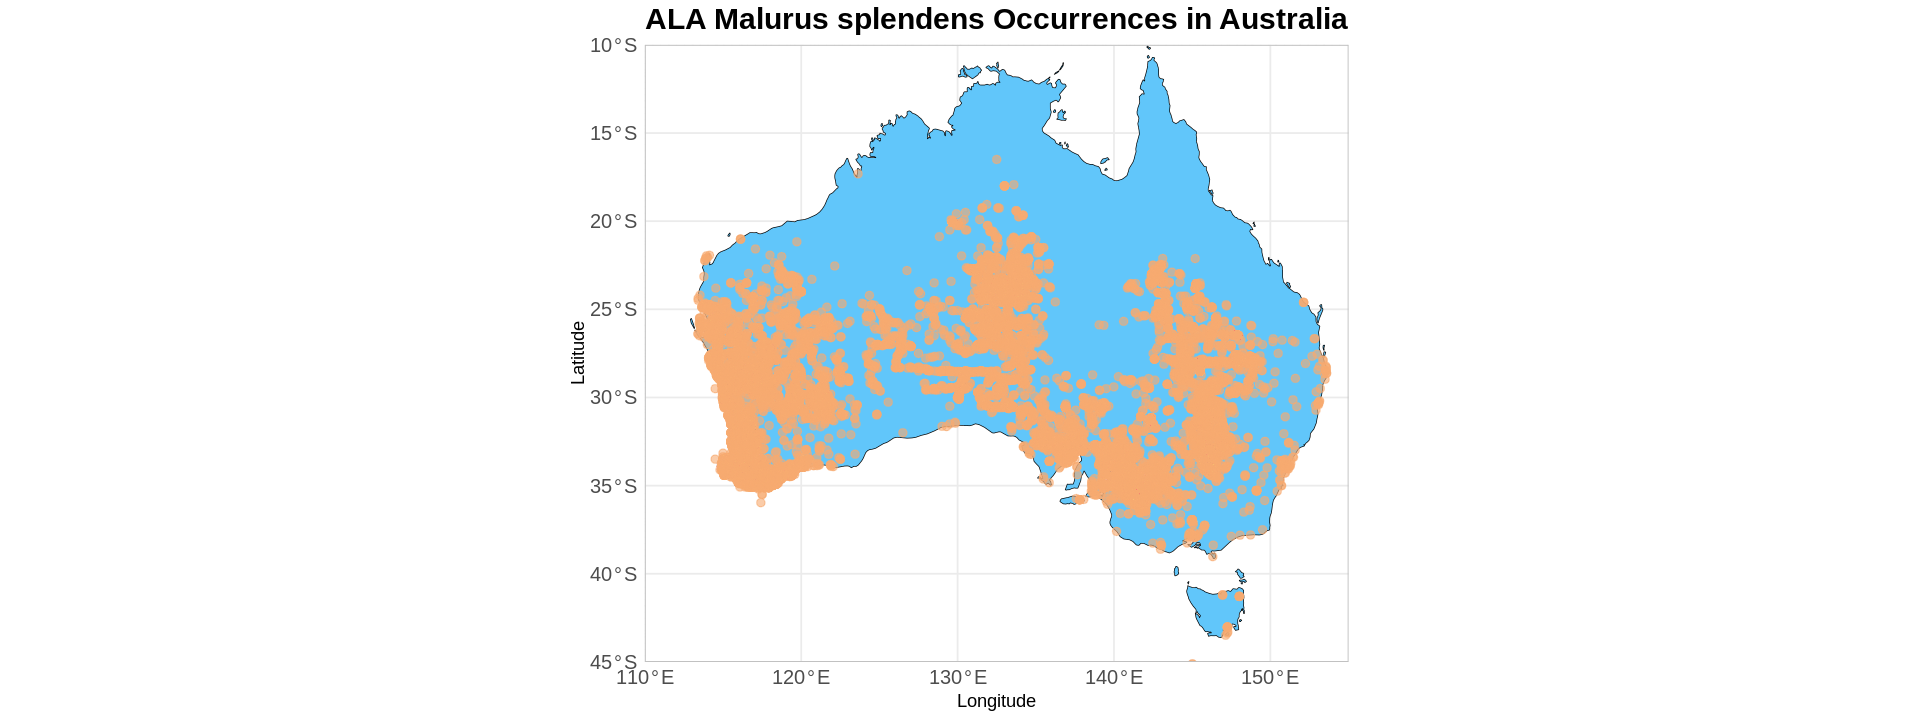

In [ ]:
# Plot the occurrences on the map

ggplot() +
  geom_sf(data = australia_map, fill = "#61c6fa", color = "black") +  # Australia map fill and outline color
  geom_point(data = GBIF_data, aes(x = decimalLongitude, y = decimalLatitude),
             color = "#f6aa70", alpha = 0.6, size = 2) +  # Occurrence points (adjusted color to match the palette)
  coord_sf(xlim = c(110, 155), ylim = c(-45, -10), expand = FALSE) +  # Set map limits to focus on Australia
  labs(
    x = "Longitude",
    y = "Latitude",
    title = "ALA Malurus splendens Occurrences in Australia"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12),
    legend.text = element_text(size = 12),
    panel.border = element_rect(colour = "gray", fill = NA, linewidth = 0.5)
  )


In [ ]:
colnames(ALA_data)

[1] "recordID"         "scientificName"   "taxonConceptID"   "decimalLatitude" 
[5] "decimalLongitude" "eventDate"        "occurrenceStatus" "dataResourceName"

There is no "year" column in the ALA data, however, there is an "eventDate" formatted as "YYYY-MM-DD time", (ie. "1991-06-01 00:00:00"), to get the information of year, we need to extrat the year out and make a new column.

In [ ]:
install.packages("lubridate")
# Load necessary library
library(lubridate)

# Extract the year from the 'eventDate' column and create a new 'year' column
ALA_data$year <- year(ymd_hms(ALA_data$eventDate))

# Display the first few rows of the data to confirm
head(ALA_data)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Warning message:
“ 37928 failed to parse.”


recordID,scientificName,taxonConceptID,decimalLatitude,decimalLongitude,eventDate,occurrenceStatus,dataResourceName,year
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dttm>,<chr>,<chr>,<dbl>
000072cc-e6c1-415d-89fb-ec8ad02c2aa1,Malurus (Malurus) splendens,https://biodiversity.org.au/afd/taxa/e75f846e-944e-431e-8c43-b376ac1e2b87,-31.29115,142.3199,1991-06-01 00:00:00,PRESENT,NSW BioNet Atlas,NA
0000c9da-cd09-4365-ab2e-1105b1db19d8,Malurus (Malurus) splendens,https://biodiversity.org.au/afd/taxa/e75f846e-944e-431e-8c43-b376ac1e2b87,-34.80833,117.6250,2002-04-09 00:00:00,PRESENT,"BirdLife Australia, Birdata",NA
00011157-7e89-43f6-b6a0-140fdc131f47,Malurus (Malurus) splendens,https://biodiversity.org.au/afd/taxa/e75f846e-944e-431e-8c43-b376ac1e2b87,-33.01154,146.0619,2015-07-04 08:00:00,PRESENT,eBird Australia,2015
00011aaa-317d-458a-aef0-b72fe963110e,Malurus (Malurus) splendens,https://biodiversity.org.au/afd/taxa/e75f846e-944e-431e-8c43-b376ac1e2b87,-26.50000,126.5000,1972-08-28 00:00:00,PRESENT,Historical Bird Atlas,NA
00018f6c-4c27-4eae-a4e1-9ac441c616aa,Malurus (Malurus) splendens,https://biodiversity.org.au/afd/taxa/e75f846e-944e-431e-8c43-b376ac1e2b87,-23.50750,133.5850,2000-09-18 00:00:00,PRESENT,"BirdLife Australia, Birdata",NA
00019f50-d27c-41e7-a0ff-744313b19b67,Malurus (Malurus) splendens,https://biodiversity.org.au/afd/taxa/e75f846e-944e-431e-8c43-b376ac1e2b87,-33.64825,115.4016,2022-09-30 09:24:00,PRESENT,eBird Australia,2022


Warning message:
“Removed 41123 rows containing non-finite outside the scale range
(`stat_bin()`).”
Warning message:
“Removed 41123 rows containing non-finite outside the scale range
(`stat_bin()`).”


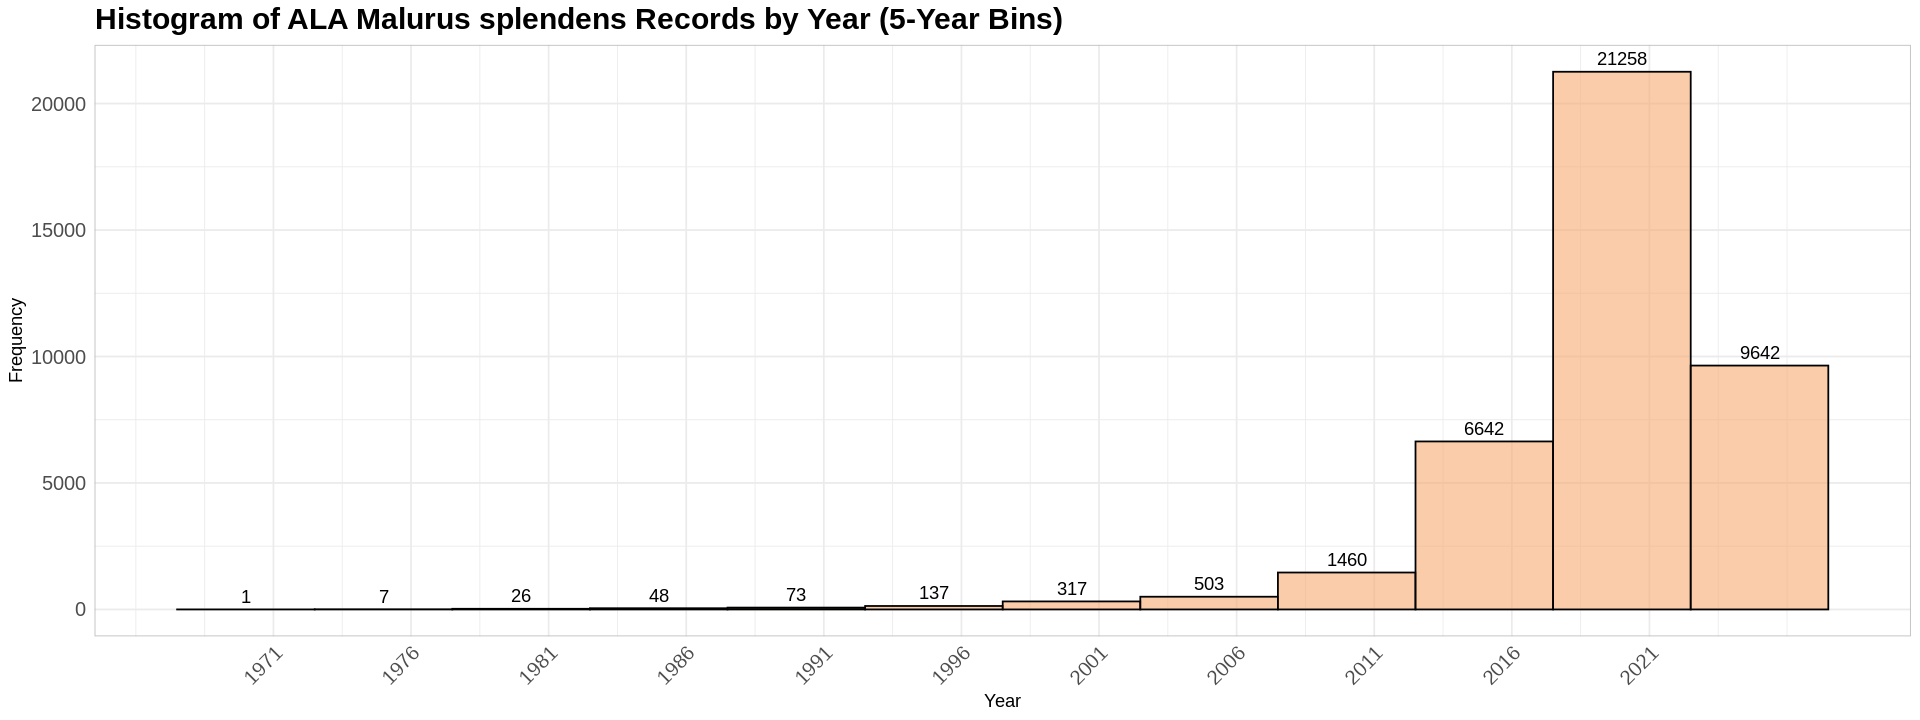

In [ ]:
# Set plot width and height for an interactive environment
options(repr.plot.width = 16, repr.plot.height = 6)

# Creating a histogram of the 'year' column with the updated style
ALA_hist_plot <- ggplot(ALA_data, aes(x = year)) +
  geom_histogram(binwidth = 5, fill = "#f6aa70", color = "black", alpha = 0.6) +  # Updated color to match the palette
  labs(
    title = "Histogram of ALA Malurus splendens Records by Year (5-Year Bins)",
    x = "Year",
    y = "Frequency"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),  # Rotate x-axis labels by 45 degrees
    axis.text.y = element_text(size = 12),
    panel.border = element_rect(colour = "gray", fill = NA, linewidth = 0.5)
  ) +
  scale_x_continuous(breaks = seq(min(ALA_data$year, na.rm = TRUE), max(ALA_data$year, na.rm = TRUE), by = 5)) +
  stat_bin(binwidth = 5, geom = "text", aes(label = ..count..), vjust = -0.5, color = "black")

# Display the plot
print(ALA_hist_plot)

## 3.3 eBird

To access and download the eBird Basic Dataset updated on the 15th of each month, you are required to request access by submitting a form via [eBird Data Access](https://ebird.org/data/download?_ga=2.68545554.288689875.1731287369-1776978368.1731287369&_gl=1*u5ha8k*_gcl_au*NDc4OTIxNDIxLjE3MzEyODczNjk.*_ga*MTc3Njk3ODM2OC4xNzMxMjg3MzY5*_ga_QR4NVXZ8BM*MTczMTQ2Nzg3MC44LjEuMTczMTQ2OTYzNy41Ni4wLjA.).

This session will be updated when we are granted the access of eBird data.

# 4. Compare the Malurus splendens data downloaded from three data protals.

## 4.1 Amount



In [53]:
nrow(GBIF_data)
nrow(ALA_data)

[1] 82959

[1] 81237

## 4.2 Time range

In [55]:
# Assuming your dataframes are named GBIF_data and ALA_data and the year column is named 'year'

# Get the year range for GBIF data
gbif_year_min <- min(GBIF_data$year, na.rm = TRUE)
gbif_year_max <- max(GBIF_data$year, na.rm = TRUE)

# Get the year range for ALA data
ala_year_min <- min(ALA_data$year, na.rm = TRUE)
ala_year_max <- max(ALA_data$year, na.rm = TRUE)

# Display the year ranges
cat("GBIF Year Range:", gbif_year_min, "-", gbif_year_max, "\n")
cat("ALA Year Range:", ala_year_min, "-", ala_year_max, "\n")


GBIF Year Range: 1839 - 2024 
ALA Year Range: 1971 - 2024 


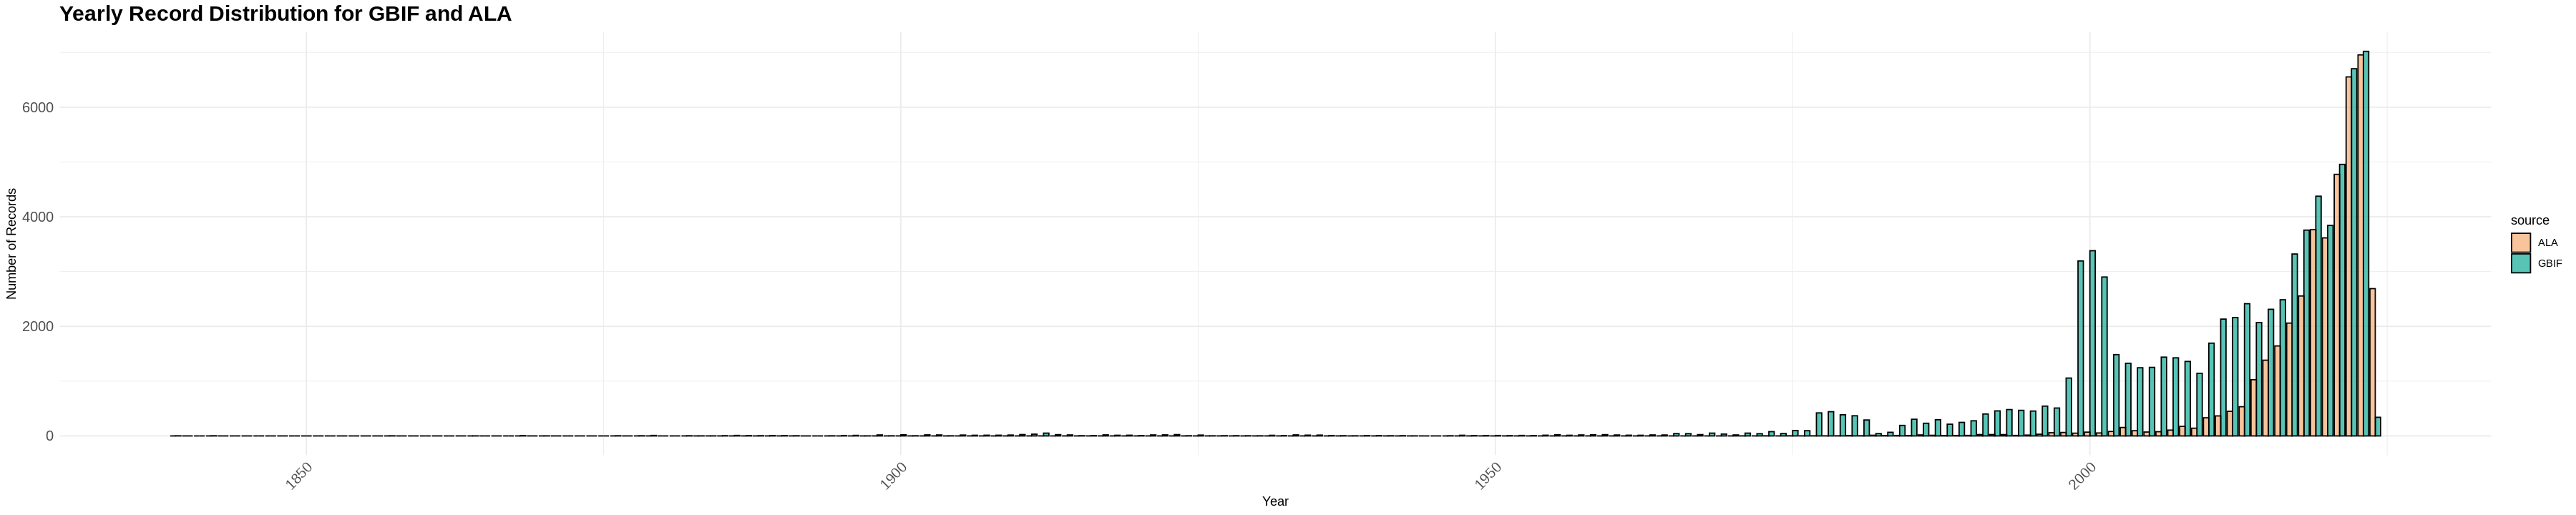

In [60]:
# Load libraries
library(ggplot2)
library(dplyr)
library(tidyr)

# Set plot width and height for an interactive environment
options(repr.plot.width = 30, repr.plot.height = 6)

# Define the range of years based on the combined datasets
all_years <- data.frame(year = seq(min(c(GBIF_data$year, ALA_data$year), na.rm = TRUE),
                                   max(c(GBIF_data$year, ALA_data$year), na.rm = TRUE), by = 1))

# Prepare GBIF data with all years and fill missing records with 0
GBIF_data_complete <- all_years %>%
  left_join(GBIF_data %>% count(year), by = "year") %>%
  mutate(source = "GBIF", n = replace_na(n, 0))

# Prepare ALA data with all years and fill missing records with 0
ALA_data_complete <- all_years %>%
  left_join(ALA_data %>% count(year), by = "year") %>%
  mutate(source = "ALA", n = replace_na(n, 0))

# Combine the two datasets
combined_data <- rbind(GBIF_data_complete, ALA_data_complete)

# Plot the histogram with overlaid colors for GBIF and ALA
hist_plot <- ggplot(combined_data, aes(x = year, y = n, fill = source)) +
  geom_bar(stat = "identity", position = "dodge", color = "black", alpha = 0.7) +  # Use dodge to place bars side-by-side
  scale_fill_manual(values = c("GBIF" = "#11aa96", "ALA" = "#f6aa70")) +  # Custom colors for each source
  labs(
    title = "Yearly Record Distribution for GBIF and ALA",
    x = "Year",
    y = "Number of Records"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 12)
  )

# Display the plot
print(hist_plot)


## 4.3 Information included

In [62]:
# Get column names for each dataset
gbif_columns <- colnames(GBIF_data)
ala_columns <- colnames(ALA_data)

# Find common columns
common_columns <- intersect(gbif_columns, ala_columns)

# Find columns unique to each dataset
gbif_unique_columns <- setdiff(gbif_columns, ala_columns)
ala_unique_columns <- setdiff(ala_columns, gbif_columns)

# Display the results
cat("Common columns:\n")
print(common_columns)

cat("\nColumns unique to GBIF dataset:\n")
print(gbif_unique_columns)

cat("\nColumns unique to ALA dataset:\n")
print(ala_unique_columns)


Common columns:
[1] "scientificName"   "occurrenceStatus" "decimalLatitude"  "decimalLongitude"
[5] "eventDate"        "year"             "source"          

Columns unique to GBIF dataset:
 [1] "gbifID"                           "datasetKey"                      
 [3] "occurrenceID"                     "kingdom"                         
 [5] "phylum"                           "class"                           
 [7] "order"                            "family"                          
 [9] "genus"                            "species"                         
[11] "infraspecificEpithet"             "taxonRank"                       
[13] "verbatimScientificName"           "verbatimScientificNameAuthorship"
[15] "countryCode"                      "locality"                        
[17] "stateProvince"                    "individualCount"                 
[19] "publishingOrgKey"                 "coordinateUncertaintyInMeters"   
[21] "coordinatePrecision"              "elevation"         

In [63]:
# Create a summary data frame
column_comparison <- data.frame(
  Column = unique(c(gbif_columns, ala_columns)),
  In_GBIF = ifelse(unique(c(gbif_columns, ala_columns)) %in% gbif_columns, "Yes", "No"),
  In_ALA = ifelse(unique(c(gbif_columns, ala_columns)) %in% ala_columns, "Yes", "No")
)

# Display the comparison table
print(column_comparison)


                             Column In_GBIF In_ALA
1                            gbifID     Yes     No
2                        datasetKey     Yes     No
3                      occurrenceID     Yes     No
4                           kingdom     Yes     No
5                            phylum     Yes     No
6                             class     Yes     No
7                             order     Yes     No
8                            family     Yes     No
9                             genus     Yes     No
10                          species     Yes     No
11             infraspecificEpithet     Yes     No
12                        taxonRank     Yes     No
13                   scientificName     Yes    Yes
14           verbatimScientificName     Yes     No
15 verbatimScientificNameAuthorship     Yes     No
16                      countryCode     Yes     No
17                         locality     Yes     No
18                    stateProvince     Yes     No
19                 occurrenceSt